In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix 
import pandas as pd

In [29]:
data = pd.read_csv('../banknotes.csv')
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [30]:
X = data.drop('Class', axis=1)
y = data['Class']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

In [35]:
print('Accuracy: ', accuracy * 100)
print('Confusion Matrix: ', confusion_matrix)

Accuracy:  98.54545454545455
Confusion Matrix:  [[146   2]
 [  2 125]]


In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)
print('AUC Score: ', auc_score)

AUC Score:  0.9996807831453501


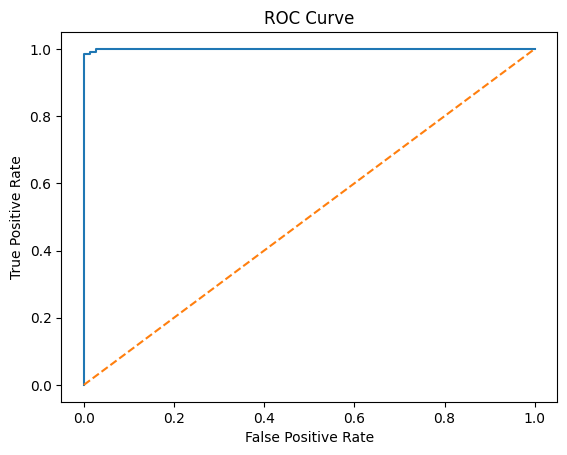

In [37]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()